<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_digits

In [3]:
# Load the dataset
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=13)

0.8407407407407408
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.83      0.87      0.85        52
           2       0.83      0.78      0.80        58
           3       0.82      0.71      0.76        66
           4       0.82      0.90      0.86        52
           5       0.88      0.87      0.88        61
           6       0.93      0.93      0.93        56
           7       0.76      0.82      0.79        50
           8       0.84      0.79      0.82        53
           9       0.77      0.84      0.80        51

    accuracy                           0.84       540
   macro avg       0.84      0.85      0.84       540
weighted avg       0.84      0.84      0.84       540



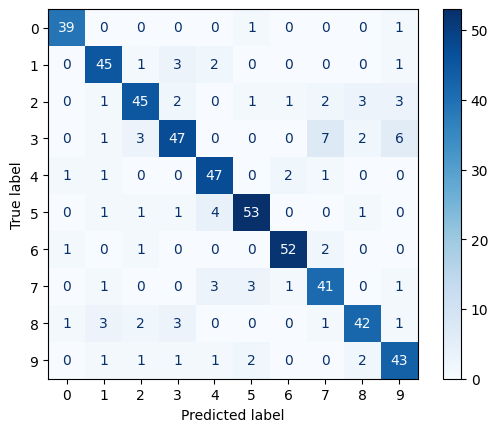

In [4]:
dg_tree = DecisionTreeClassifier(random_state=17)
dg_tree.fit(X_train, y_train)

tree_pred = dg_tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
#plot_confusion_matrix(dg_tree, X_test, y_test, cmap = 'Green')

disp = ConfusionMatrixDisplay.from_estimator(dg_tree, X_test, y_test, cmap = plt.cm.Blues)
#print(disp.confusion_matrix)

In [5]:
tree_params = {'max_depth' : [1, 2, 3, 5, 10, 20, 25, 30, 50], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50]}

dg_tree_grid = GridSearchCV(dg_tree, tree_params, cv=5, n_jobs=-1, verbose=True)
dg_tree_grid.fit(X_train, y_train)

print("Best parameters are ", dg_tree_grid.best_params_)
print("Best score is ", dg_tree_grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters are  {'max_depth': 10, 'max_features': 50}
Best score is  0.8321570859419465


In [6]:
dg_tree_val = DecisionTreeClassifier(max_depth=10, max_features=50,random_state=17)
dg_tree_val.fit(X_train, y_train)

tree_pred = dg_tree_val.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
#plot_confusion_matrix(dg_tree, X_test, y_test, cmap = 'Greens')

0.8314814814814815
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.68      0.73      0.70        52
           2       0.81      0.86      0.83        58
           3       0.79      0.68      0.73        66
           4       0.76      0.90      0.82        52
           5       0.94      0.84      0.89        61
           6       0.91      0.93      0.92        56
           7       0.93      0.80      0.86        50
           8       0.79      0.85      0.82        53
           9       0.81      0.82      0.82        51

    accuracy                           0.83       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.83      0.83       540



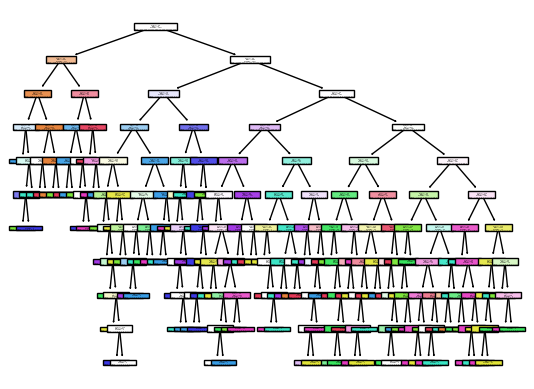

In [7]:
from sklearn import tree

tree.plot_tree(dg_tree_val, filled=True)
plt.show()

In [9]:
forest_model = RandomForestClassifier(random_state = 0)
forest_model.fit(X_train, y_train)

forest_pred = forest_model.predict(X_test)
print("Score at the training set: {:.3f}".format(forest_model.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(forest_model.score(X_test, y_test)))
print(classification_report(y_test, forest_pred))
#plot_confusion_matrix(forest_model, X_test, y_test, cmap = 'Greens')

Score at the training set: 1.000
Score at the test set: 0.972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.93      1.00      0.96        52
           2       1.00      1.00      1.00        58
           3       0.98      0.95      0.97        66
           4       0.98      1.00      0.99        52
           5       0.98      0.98      0.98        61
           6       1.00      0.98      0.99        56
           7       0.98      0.96      0.97        50
           8       0.96      0.89      0.92        53
           9       0.91      0.96      0.93        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [10]:
forest_params = {'n_estimators' : [5, 10, 100, 150, 200, 250]}

forest_grid = GridSearchCV(forest_model, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

print("Best parameters are ", forest_grid.best_params_)
print("Best score is ", forest_grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters are  {'n_estimators': 100}
Best score is  0.9761240751280592


In [11]:
forest_model_best = RandomForestClassifier(n_estimators=250, random_state = 0)
forest_model_best.fit(X_train, y_train)

forest_pred = forest_model_best.predict(X_test)
print(accuracy_score(y_test, forest_pred))
print(classification_report(y_test, forest_pred))
#plot_confusion_matrix(forest_model_best, X_test, y_test, cmap = 'Greens')

0.975925925925926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.96      1.00      0.98        52
           2       1.00      1.00      1.00        58
           3       0.98      0.95      0.97        66
           4       0.98      1.00      0.99        52
           5       0.98      0.97      0.98        61
           6       1.00      1.00      1.00        56
           7       0.98      0.98      0.98        50
           8       0.96      0.91      0.93        53
           9       0.91      0.96      0.93        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [12]:
svc_model_lin = SVC(kernel='linear')
svc_model_lin.fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(svc_model_lin.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(svc_model_lin.score(X_test, y_test)))

Score at the training set: 1.000
Score at the test set: 0.967


In [13]:
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(svc_model_rbf.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(svc_model_rbf.score(X_test, y_test)))

Score at the training set: 0.998
Score at the test set: 0.985


In [14]:
svc_model_rbf10 = SVC(kernel='poly')
svc_model_rbf10.fit(X_train, y_train)
print("Score at the training set: {:.3f}".format(svc_model_rbf10.score(X_train, y_train)))
print("Score at the test set: {:.3f}".format(svc_model_rbf10.score(X_test, y_test)))

Score at the training set: 1.000
Score at the test set: 0.985


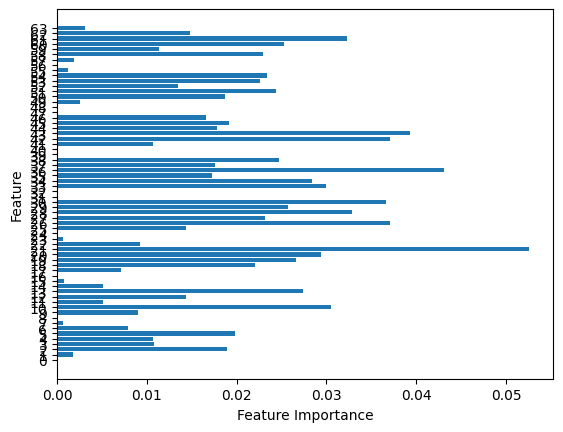

In [17]:
def plot_feature_importance_digits(model, feature_names):
  n_features = len(feature_names)
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), feature_names)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")
  plt.show()

best_forest_model = forest_grid.best_estimator_  # Getting the best estimator from the grid search
feature_names = [str(i) for i in range(digits.data.shape[1])]  # Generating feature names
plot_feature_importance_digits(best_forest_model, feature_names)